Bu veri seti, Agaricus ve Lepiota familyasındaki mantarlarda bulunan 23 özelliğini içeriyor. Bu özellikler mantarın farklı kısımlarına (başlık, solungaç, sap, halka) vb. bölümlere ayırdık. Veri setinde ayrıca yaşam alanlarından özellikler de vardır. 

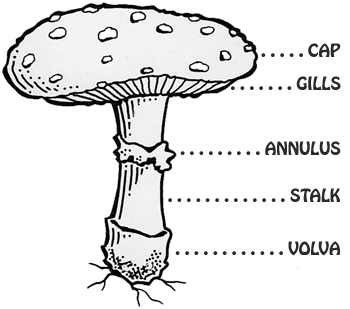


numpy, pandas ve matplotlib kütüphanelerimizi import ediyoruz. Çünkü bu kütüphaneleri birçok yerde kullanmamız gerekecek.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Bu kısımda ise pandas kütüphanesi kullanarak read_csv diyerek csv dosyamızı okumamızı sağlıyoruz. Artık elimizde mushdataset diye bir pandas veriable mız oluyor.

In [ ]:
mushdataset = pd.read_csv('../input/mushroom-classification/mushrooms.csv')


Daha sonra mushdataset.shape diyerek datamızın içinde kaç tane görselimizin olduğunu ve kaç tane column sayımızın olduğunu gördük.

In [ ]:
mushdataset.shape

Veri setinde 22 özellik ve 8124 farklı örnek (satır) vardır.

İnfo () işlevi, tüm özniteliklerin yanı sıra kaç tane boş olmayan değere sahip olduğunu ve türlerini görmemizi sağlar.


In [ ]:
mushdataset.info()

mushdataset.head() diyerek datasetimizin ilk 5 satırımızı göstermiş olduk. Burada 1. labelımız yani class coloumn u poisonous=p yani mantarımızın zehirli olduğunu söylüyor. 2. labelımız ise edible=e, yani mantarımızın yenilebilir olduğunu söylüyor.

In [ ]:
mushdataset.head()

In [ ]:
mushdataset.describe(include='all')

Hedef özellik mantar sınıfı olacaktır. Bu özellik ikilidir: yenilebilir veya zehirlidir. Hedef değişkenin dağılımını görelim.

In [ ]:
mushdataset['class'].value_counts()/len(mushdataset)

Veriler dengelidir, böylece modelleri değerlendirmek için hem doğruluk hem de f1 puanı kullanılabilir.

Verilerimizi daha iyi keşfetmek ve anlamak için bazı özelliklerin dağılımını çizeceğiz. Başlığın sahip olabileceği farklı şekillerle başlayalım.

In [ ]:
caps = mushdataset['cap-shape'].value_counts()
print(caps)
cap_labels = caps.axes[0].tolist() 
poisonous = []
edible = [] 
ind = np.arange(6) 
for cap in cap_labels:
    size = len(mushdataset[mushdataset['cap-shape'] == cap].index)
    edibles = len(mushdataset[(mushdataset['cap-shape'] == cap) & (mushdataset['class'] == 'e')].index)
    edible.append(edibles)
    poisonous.append(size-edibles)

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible , width, color='#93c244')
poison_bars = ax.bar(ind+width, poisonous , width, color='#f44336')

ax.set_title('Edible and Poisonous based on cap shape',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('convex', 'flat', 'knobbed', 'bell', 'sunken', 'conical'),fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)

plt.show()

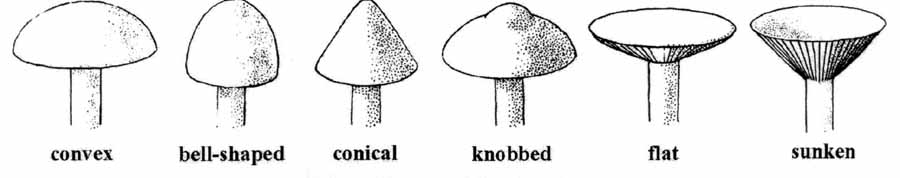


'convex= dışbükey"', 'flat= düz"', 'knobbed= topuzlu"', 'bell= çan"', 'sunken= batık"', 'conical= konik"

Grafikte görebileceğimiz gibi, hemen hemen tüm mantar başlıkları dışbükey veya düz şekilli olup, gömme veya konik şekilli kapaklı neredeyse hiçbir mantar örneği yoktur.



Popülasyon özelliğinin dağılımını görelim.

In [ ]:
popul =mushdataset['population'].value_counts()
print(popul)
popul_labels = popul.axes[0].tolist() 
poisonous = []
edible = []
ind = np.arange(6) 
for pop in popul_labels:
    size = len(mushdataset[mushdataset['population'] == pop].index)
    edibles = len(mushdataset[(mushdataset['population'] == pop) & (mushdataset['class'] == 'e')].index)
    edible.append(edibles)
    poisonous.append(size-edibles)

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible , width, color='#93c244')
poison_bars = ax.bar(ind+width, poisonous , width, color='#f44336')

ax.set_title('Edible and Poisonous based on population',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('several','solitary', 'scattered', 'numerous','abundant', 'clustered'),fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)

plt.show()

'several=birkaç','solitary=tek başına', 'scattered=dağınık', 'numerous=çok sayıda','abundant=bol', 'clustered=kümelenmiş'

Grafikte görebileceğimiz gibi, sadece yenilebilir mantarların sahip olduğu (çok sayıda ve bol miktarda) bazı popülasyon türleri vardır. Bu nitelikler, karar ağacı sınıflandırıcısını uygularken çok yardımcı olabilir.

Ayrıca halka tipi özelliğini de gözlemleyeceğiz.

In [ ]:
ringt = mushdataset['ring-type'].value_counts()
print(ringt)
ringt_labels = ringt.axes[0].tolist() 
poisonous = []
edible = []
ind = np.arange(5) 
for rt in ringt_labels:
    size = len(mushdataset[mushdataset['ring-type'] == rt].index)
    edibles = len(mushdataset[(mushdataset['ring-type'] == rt) & (mushdataset['class'] == 'e')].index)
    edible.append(edibles)
    poisonous.append(size-edibles)

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible , width, color='#93c244')
poison_bars = ax.bar(ind+width, poisonous , width, color='#f44336')

ax.set_title('Edible and Poisonous based on ring type',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('pendant','evanescent', 'large', 'flaring','none'),fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
plt.show()

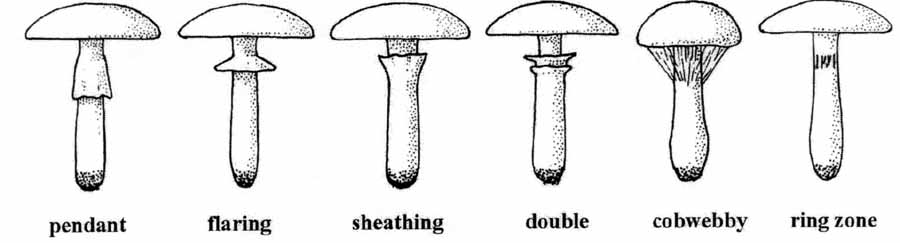

'pendant=kolye ucu','evanescent=geçici', 'large=büyük', 'flaring=parlama', 'none=yok'.


Burada sadece zehirli mantarların sahip olduğu bir tür halkalar olduğunu görebiliriz. daha fazla halka türü var, ancak bu değerlere sahip herhangi bir örnek yok, bu yüzden onları grafiğe dahil etmiyoruz.